# OPAL collider tracking example

By Carl A. Lindstrøm (University of Oslo), 2 Jun 2023

### Import OPAL framework and required classes

In [1]:
import sys
sys.path.append('../')
from opal import Collider, Linac, SourceBasic, StageNonlinear1D, InterstageELEGANT, BeamDeliverySystemBasic, InteractionPointGUINEAPIG
import numpy as np

### Define the collider elements

In [2]:
# define driver
driver = SourceBasic()
driver.Q = -5e-9 # [C]
driver.E0 = 10e9 # [eV]
driver.relsigE = 0.01
driver.sigz = 20e-6 # [m]
driver.z = 120e-6 # [m]
driver.emitnx, driver.emitny = 10e-6, 10e-6 # [m rad]
driver.betax, driver.betay = 30e-3, 30e-3 # [m]
driver.Npart = 5000
driver.wallplugEfficiency = 0.5

# define stage
stage = StageNonlinear1D()
stage.driverSource = driver
stage.deltaE = 5.5e9 # [eV]
stage.L = 1 # [m]
stage.n0 = 2e22 # [m^-3]
stage.rampBetaMagnification = 10

# define beam
source = SourceBasic()
source.Q = -2.7e-9 # [C]
source.E0 = 3e9 # [eV]
source.relsigE = 0.005
source.sigz = 12e-6 # [m]
source.z = -60e-6 # [m]
source.emitnx, source.emitny = 10e-6, 0.035e-6 # [m rad]
source.betax = stage.matchedBetaFunction(source.E0)
source.betay = source.betax
source.Npart = 1000
source.wallplugEfficiency = 0.1
source.acceleratingGradient = 25e6 # [V/m]

# define interstage
interstage = InterstageELEGANT()
interstage.beta0 = lambda E: stage.matchedBetaFunction(E)
interstage.Ldip = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.Bdip = 0.5 # [T]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_waist_x, bds.beta_waist_y = 8e-3, 0.4e-3 # [m]
bds.sigz = 0.75 * bds.beta_waist_y

# define linac
linac = Linac(source, stage, interstage, bds, Nstages = 14)

# define interaction point
ip = InteractionPointGUINEAPIG()

# define collider (with two identical linacs)
collider = Collider(linac, ip)

### Perform collider tracking

In [7]:
# track particles
collider.run("collider_example", shots = 3, overwrite = True);

>> LINAC #1
>> SHOT #1
Tracking element #1 (s = 120.0 m, -2.70 nC, 3.0 GeV, SourceBasic, stage 0)
Tracking element #2 (s = 121.0 m, -2.70 nC, 8.9 GeV, StageNonlinear1D, stage 1)
Tracking element #3 (s = 126.0 m, -2.70 nC, 8.9 GeV, InterstageELEGANT, stage 1)
Tracking element #4 (s = 127.0 m, -2.70 nC, 14.3 GeV, StageNonlinear1D, stage 2)
Tracking element #5 (s = 133.4 m, -2.70 nC, 14.3 GeV, InterstageELEGANT, stage 2)
Tracking element #6 (s = 134.4 m, -2.70 nC, 19.7 GeV, StageNonlinear1D, stage 3)
Tracking element #7 (s = 142.0 m, -2.70 nC, 19.7 GeV, InterstageELEGANT, stage 3)
Tracking element #8 (s = 143.0 m, -2.69 nC, 25.1 GeV, StageNonlinear1D, stage 4)
Tracking element #9 (s = 151.6 m, -2.69 nC, 25.1 GeV, InterstageELEGANT, stage 4)
Tracking element #10 (s = 152.6 m, -2.69 nC, 30.6 GeV, StageNonlinear1D, stage 5)
Tracking element #11 (s = 162.0 m, -2.69 nC, 30.6 GeV, InterstageELEGANT, stage 5)
Tracking element #12 (s = 163.0 m, -2.69 nC, 35.9 GeV, StageNonlinear1D, stage 6)
Track

### Plot the wakefield structure

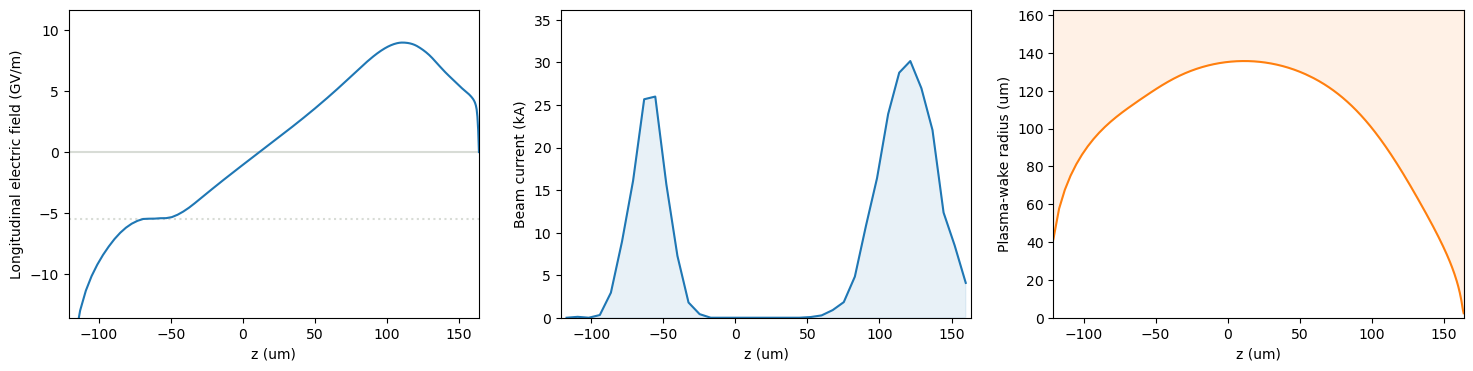

In [4]:
# plot wakefield
stage.plotWakefield(linac.initialBeam())

### Plot the beam evolution in the linac

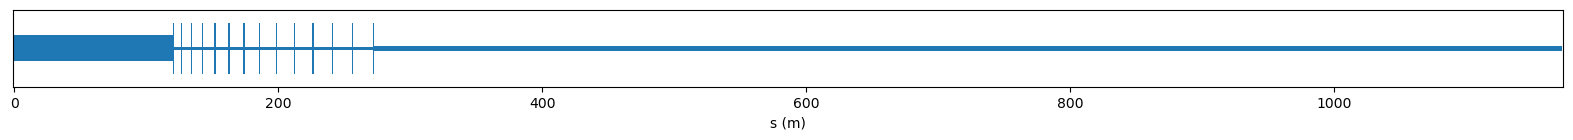

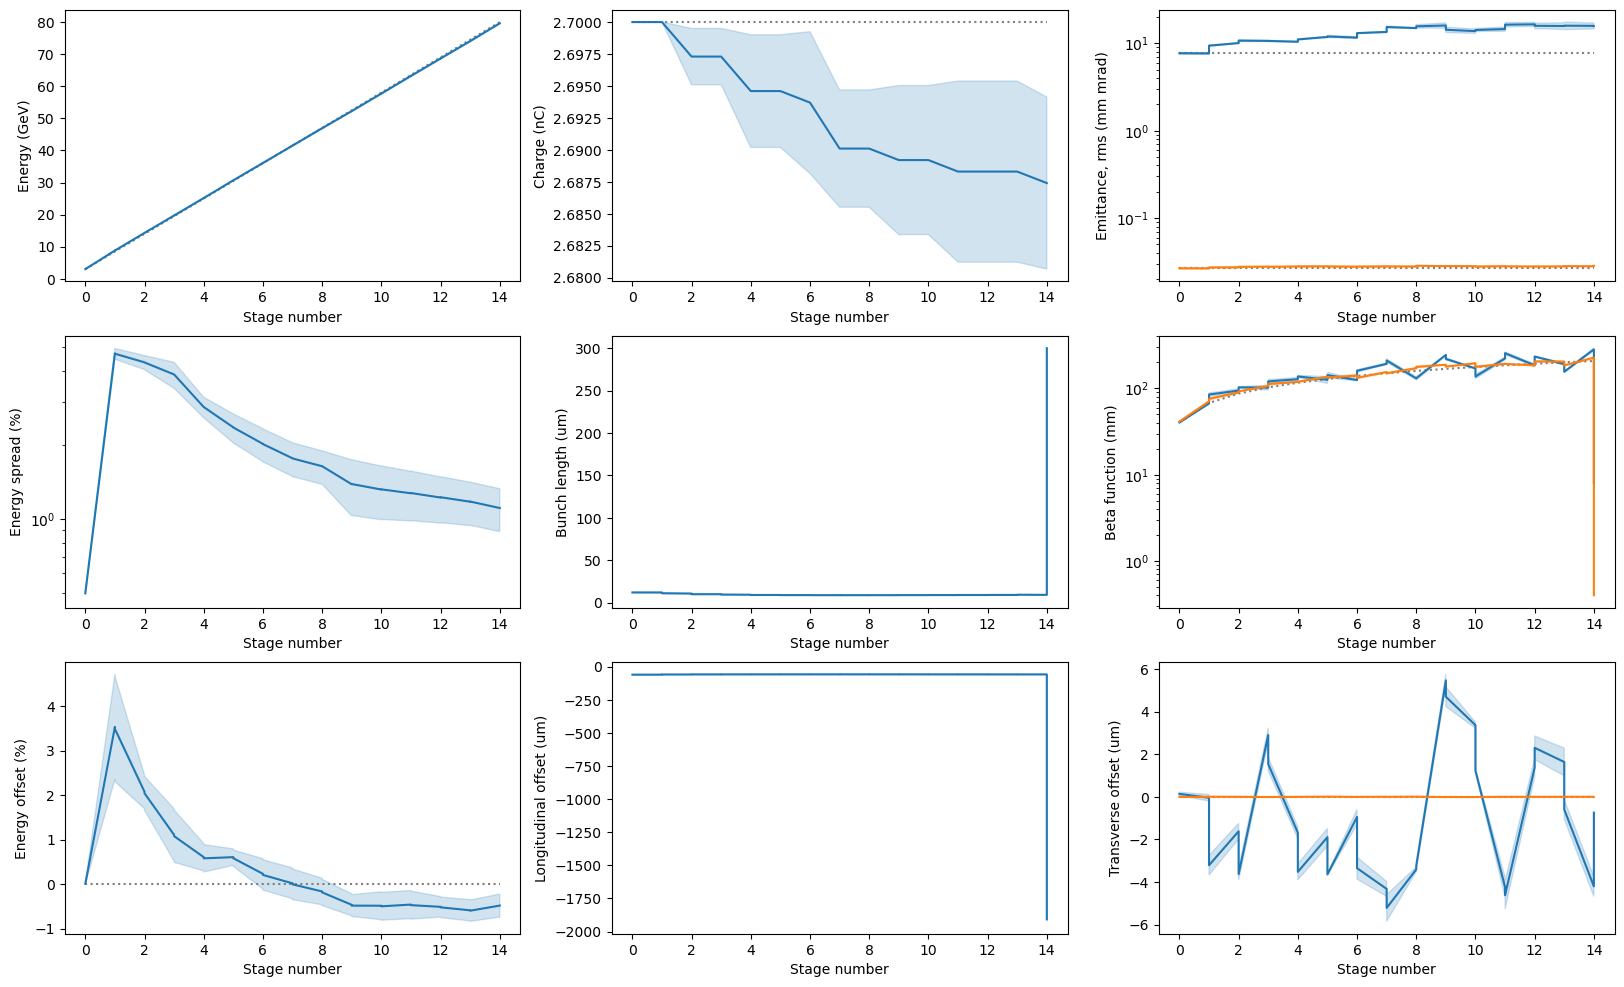

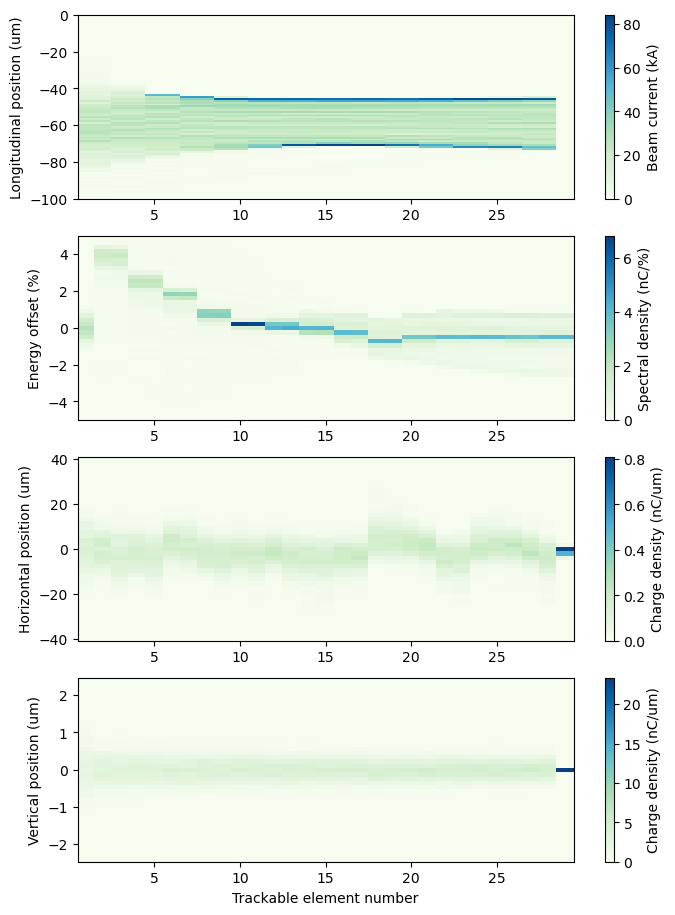

In [8]:
# plot beam evolution and linac survey
linac.plotSurvey()
linac.plotEvolution(useStageNumbers = True)
linac.plotWaterfalls()

### Plot the collider luminosity

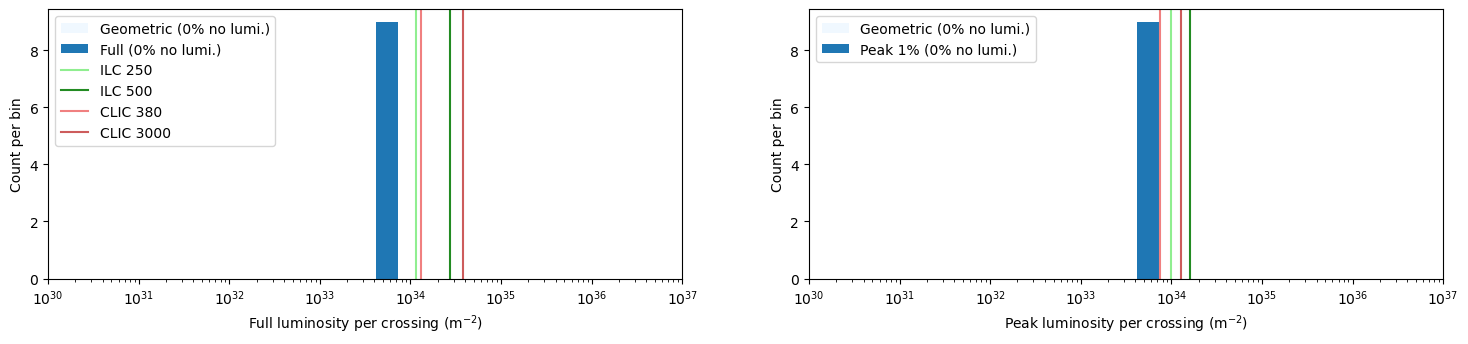

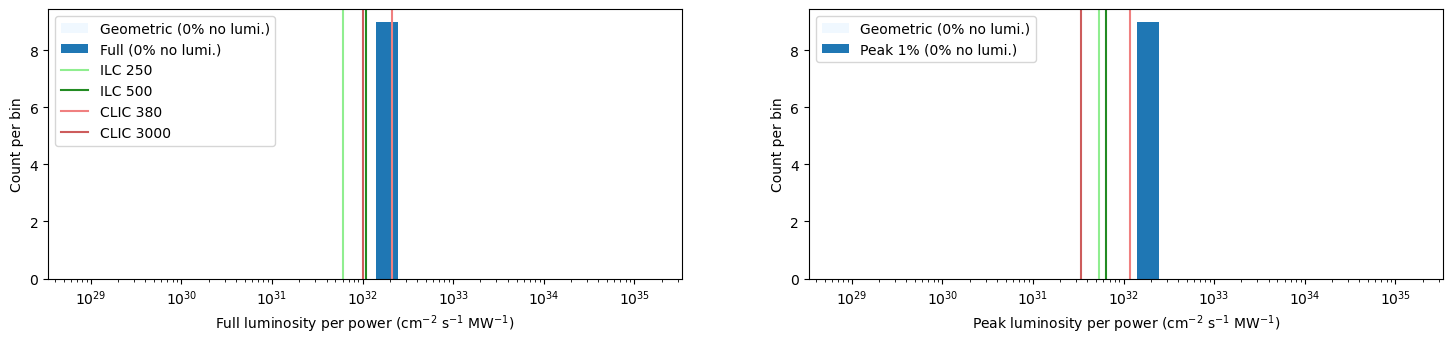

In [6]:
# plot luminosity
collider.plotLuminosity()

# plot luminosity per power
collider.plotLuminosityPerPower()